# Import necessary Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
sns.set('notebook')

In [63]:
data = pd.read_csv('data/credit.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [64]:
#Dimension of the dataset
data.shape

(100000, 28)

Analyse the dataset

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [66]:
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [67]:
data.describe(include = 'all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,NaN,NaN,NaN,10128,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,6261,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Jessicad,NaN,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,48,NaN,NaN,7096,NaN,NaN,NaN,NaN,NaN,NaN,11408,NaN,NaN,NaN,NaN,45848,NaN,NaN,NaN,52326,NaN,NaN,28616,NaN,53174
mean,80631.500000,25982.666640,4.500000,NaN,33.316340,5.004617e+08,NaN,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,NaN,21.08141,13.313120,10.470323,5.798250,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,392.697586,NaN
std,43301.486619,14340.543051,2.291299,NaN,10.764812,2.908267e+08,NaN,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,NaN,14.80456,6.237166,6.609481,3.867826,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,201.652719,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,NaN,0.00000,0.000000,0.500000,0.000000,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,43132.750000,13664.500000,2.750000,NaN,24.000000,2.451686e+08,NaN,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,NaN,10.00000,9.000000,5.380000,3.000000,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.615983,NaN
50%,80631.500000,25777.000000,4.500000,NaN,33.000000,5.006886e+08,NaN,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,NaN,18.00000,14.000000,9.400000,5.000000,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.865366,NaN
75%,118130.250000,38385.000000,6.250000,NaN,42.000000,7.560027e+08,NaN,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,NaN,28.00000,18.000000,14.850000,8.000000,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


In [68]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [69]:
#checking for duplicate rows
data.duplicated().sum()


0

In [70]:
data.drop(['Customer_ID','ID','Name'],axis=1,inplace=True)#Drop unwanted columns

Credit score is the Target column,checking percentage of each values

In [71]:
data['Credit_Score'].value_counts(normalize=True) * 100


Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64

# EDA

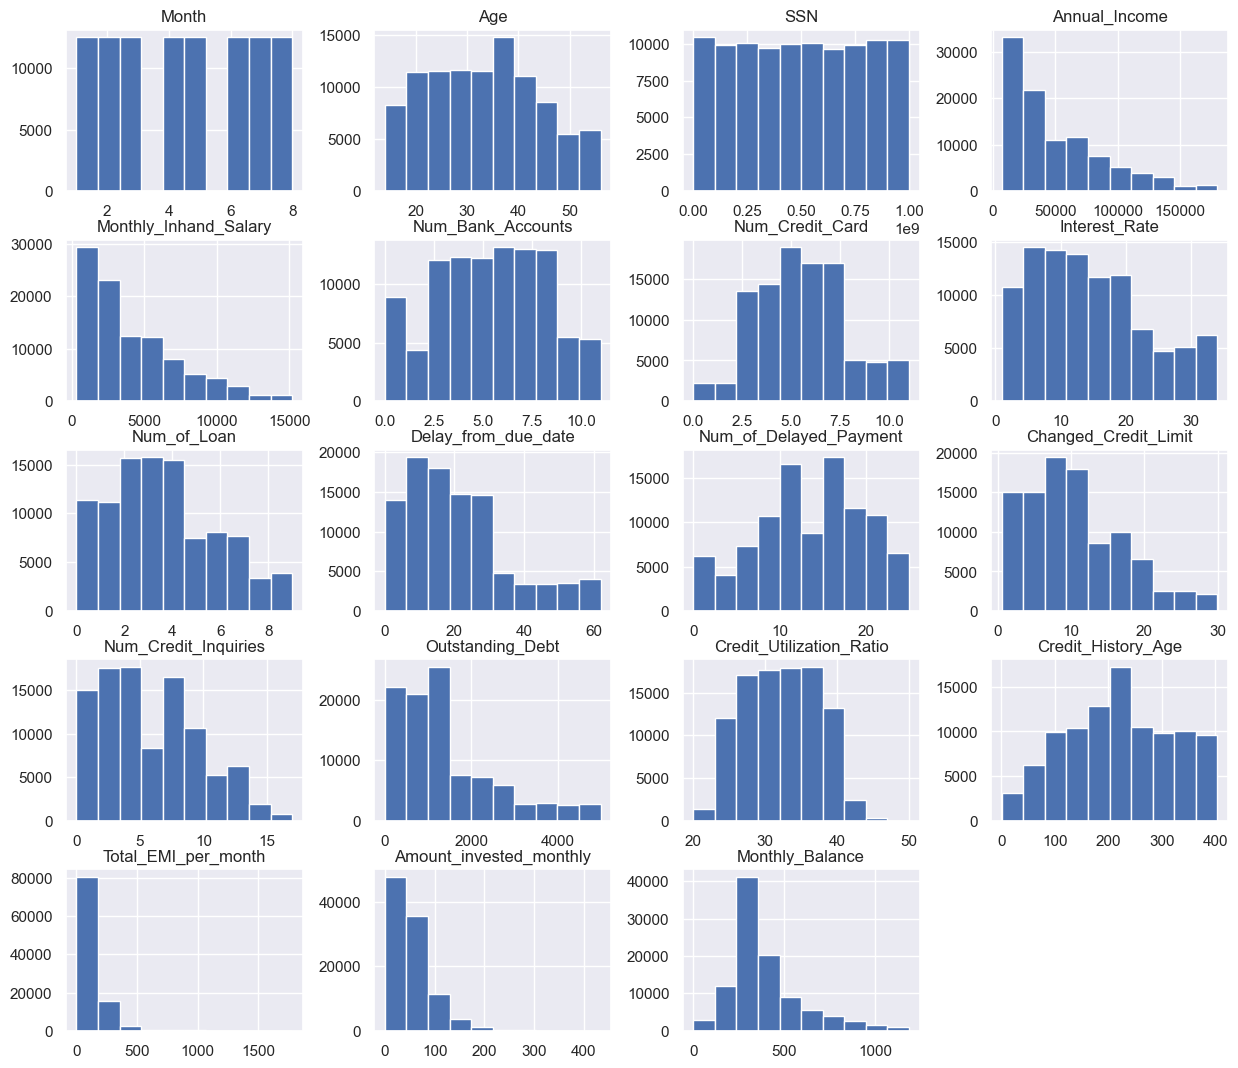

In [72]:
#Distribution of data
freqgraph = data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(15, 13))
plt.show()

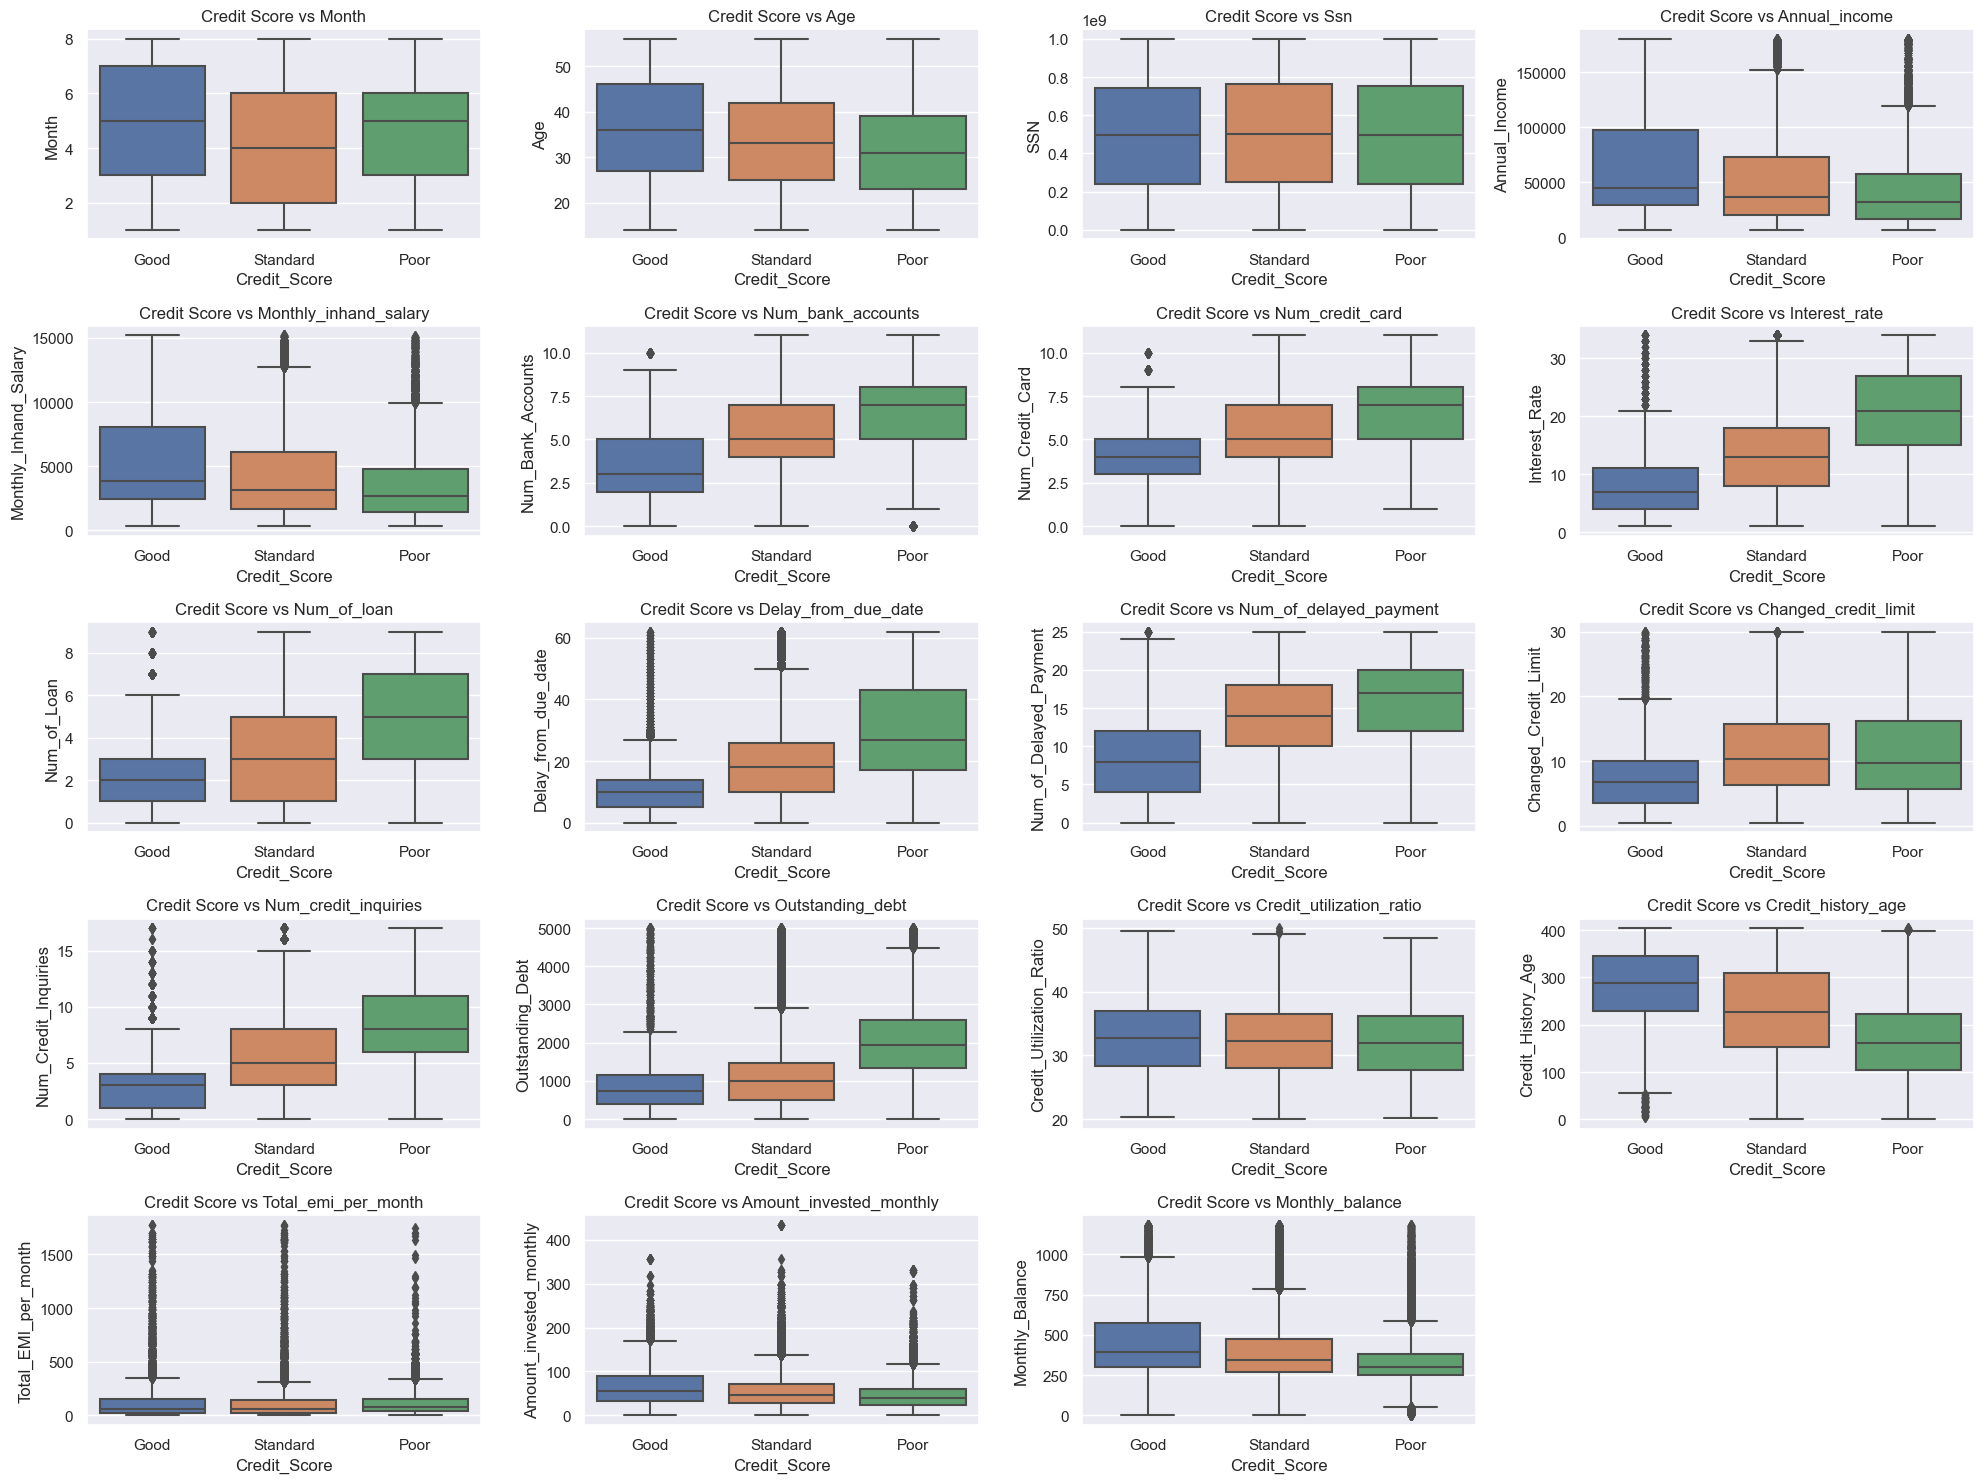

In [73]:
#box plot numerical columns
# Features to plot
features = data.select_dtypes(include=['float64','int64'])
# Create box plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 4, i)  # Create a 2x2 grid of plots
    if data[feature].dtype == 'object':  # Categorical feature
        sns.boxplot(x=feature, y='Credit_Score', data=data)
    else:  # Continuous feature
        sns.boxplot(x='Credit_Score', y=feature, data=data)
    plt.title(f'Credit Score vs {feature.capitalize()}')

plt.tight_layout()
plt.show()

Insights:
* Credit score is better for persons have higher annual income.
* Similar to annual income, a higher monthly in-hand salary leads to a better credit score.
* If no of bank accounts higher credit score will be poor.
* Similar to bank accounts no of credit cards also negatively effect credit score.
* Interest rate,no of loans,delay fro due date,no of delayed payments and outstanding debt also negatively effect credit score.
* Credit utilization ratio doesn’t affect your credit scores.
* Having a long credit history results in better credit scores.
* Emi per month and monthly invested amount are not effecting


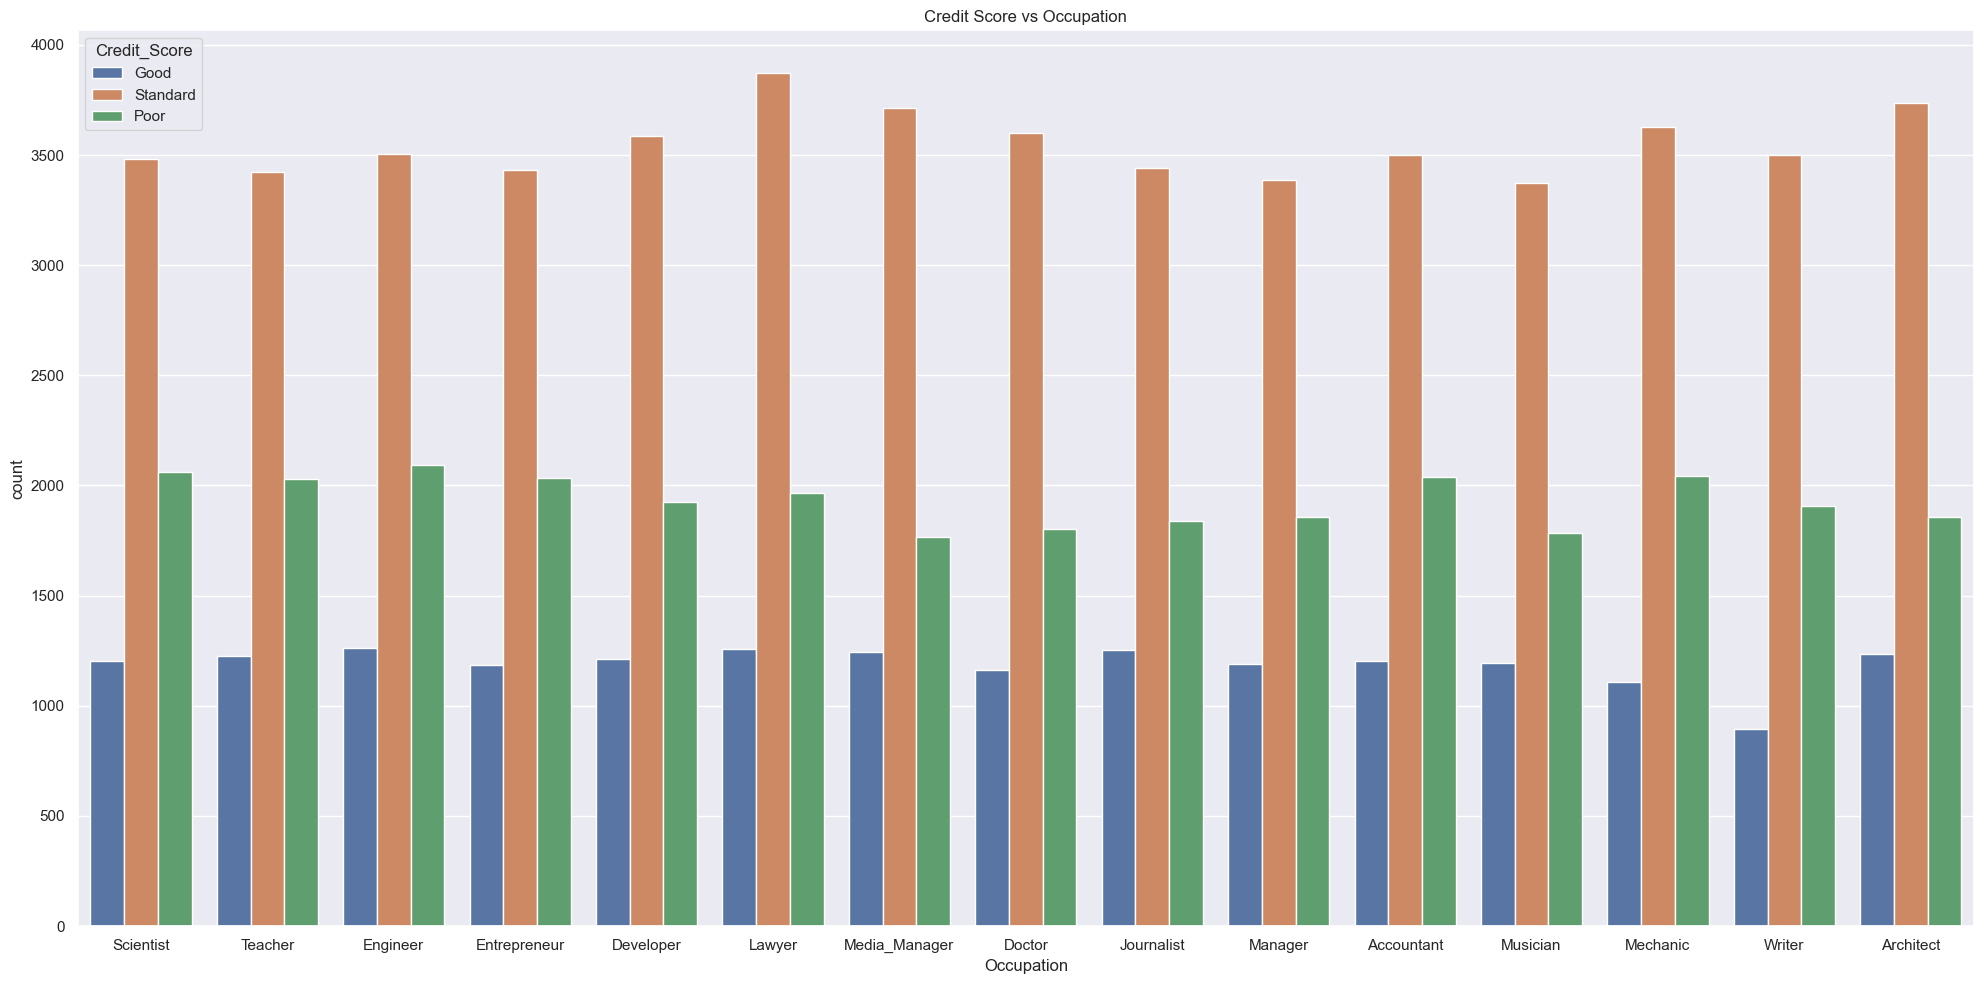

In [74]:
#Plot Credit score vs occupation
plt.figure(figsize=(20, 10))
sns.countplot(x='Occupation', hue='Credit_Score', data=data)
plt.title('Credit Score vs Occupation')
plt.tight_layout()
plt.show()
    

According to above graph ,Credit score not depending occupation.Almost same for all jobs.

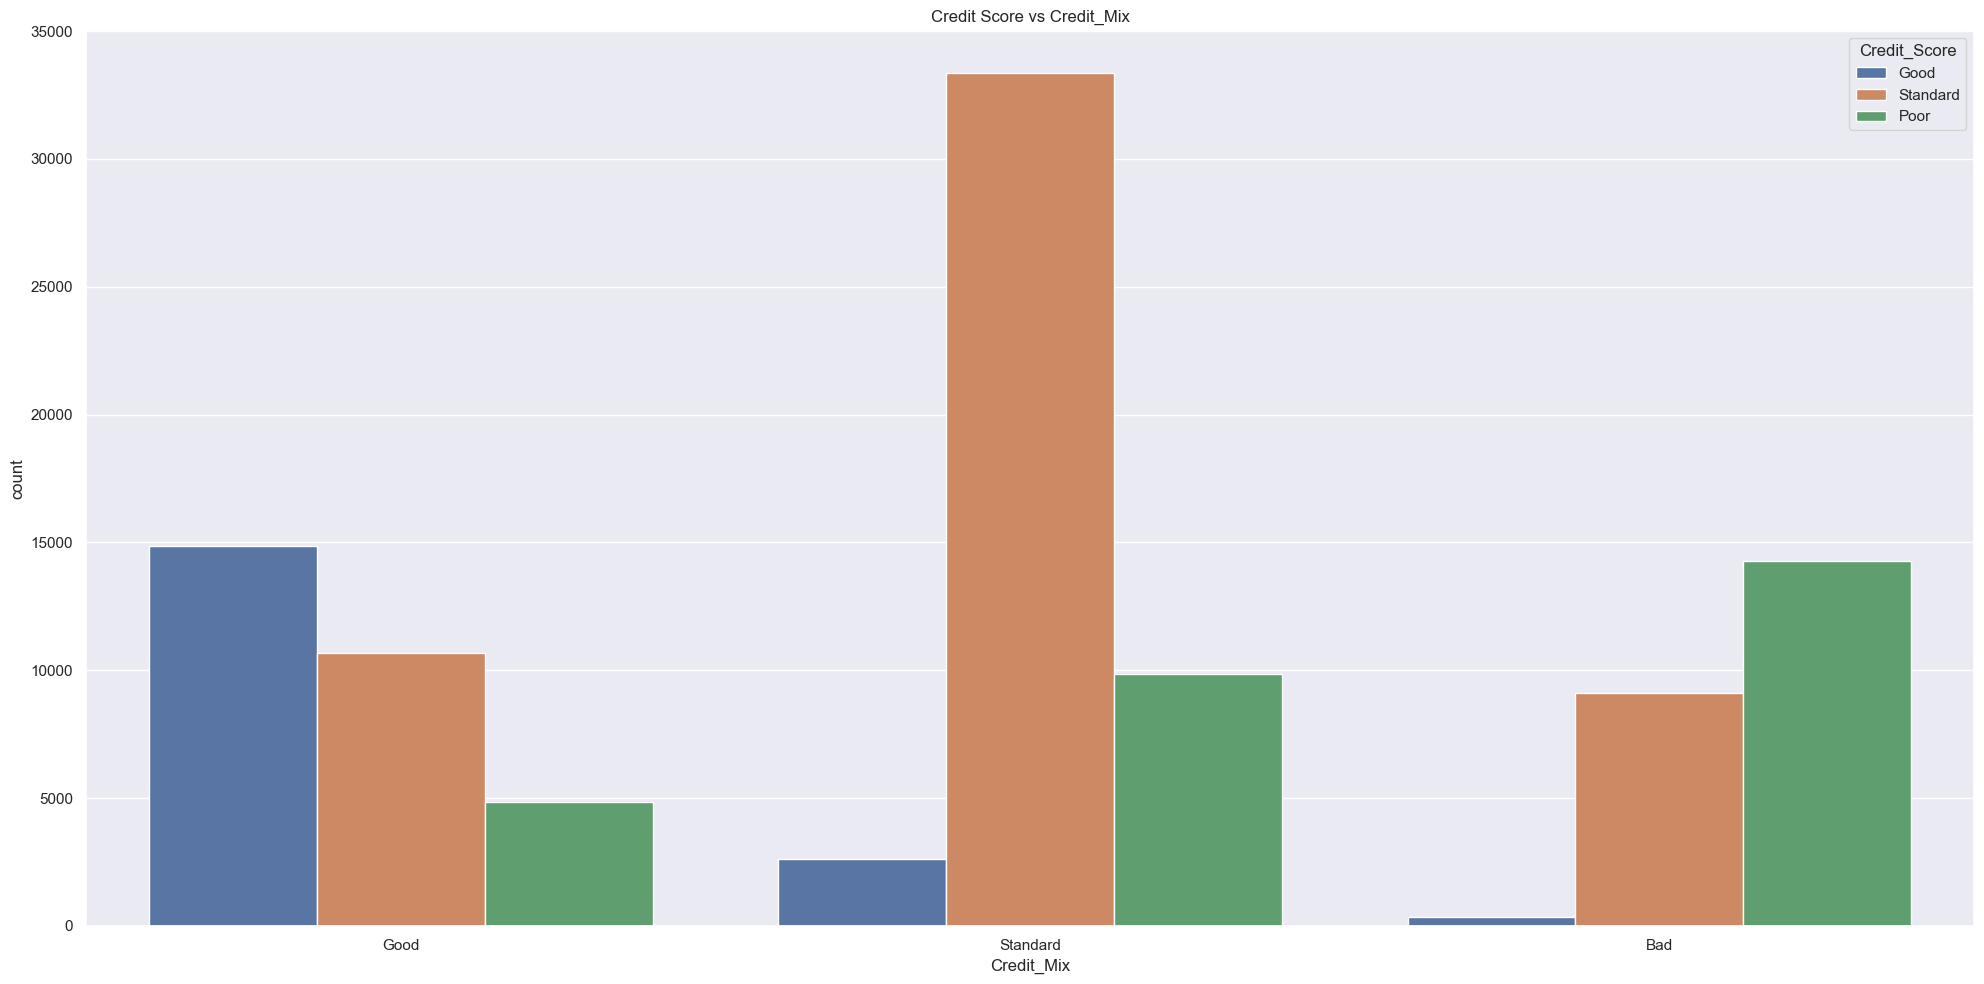

In [75]:
#Plot Credit score vs Credit mix
plt.figure(figsize=(20, 10))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=data)
plt.title('Credit Score vs Credit_Mix')
plt.tight_layout()
plt.show()

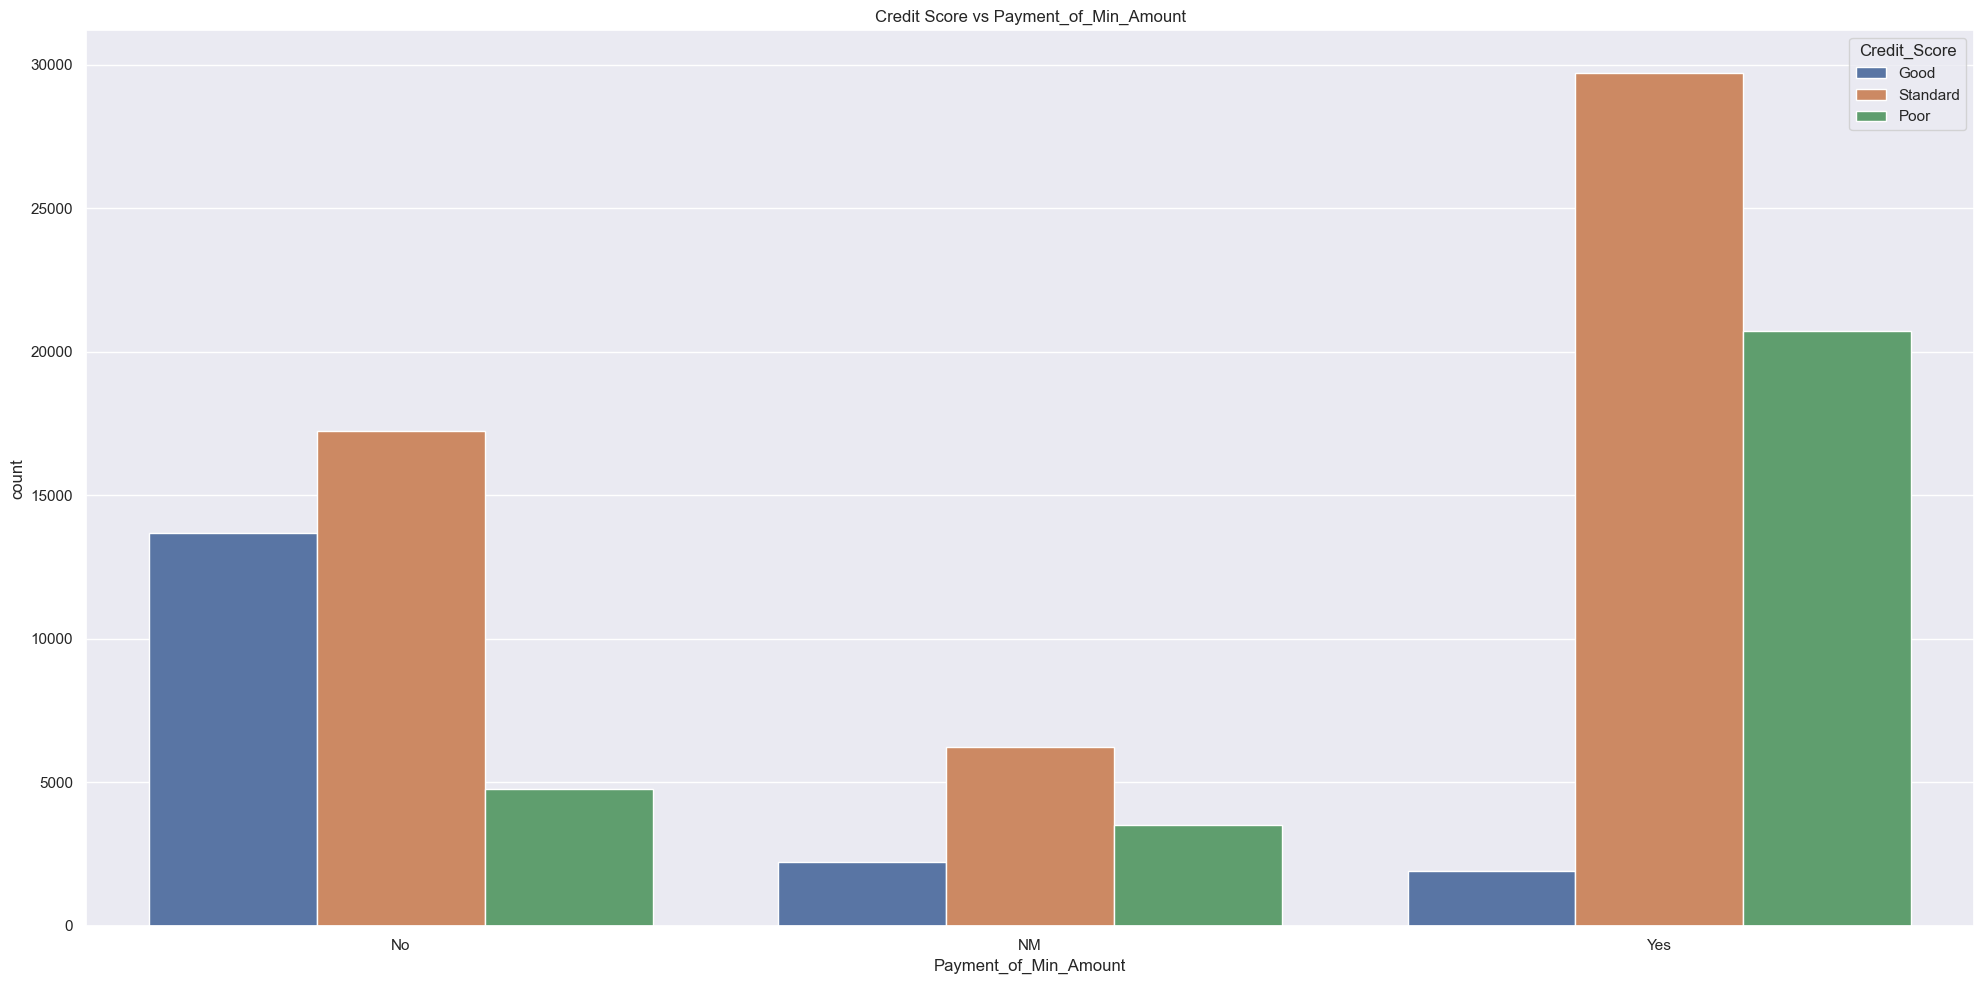

In [76]:
#Plot Credit score vs Payment_of_Min_Amount
plt.figure(figsize=(20, 10))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=data)
plt.title('Credit Score vs Payment_of_Min_Amount')
plt.tight_layout()
plt.show()

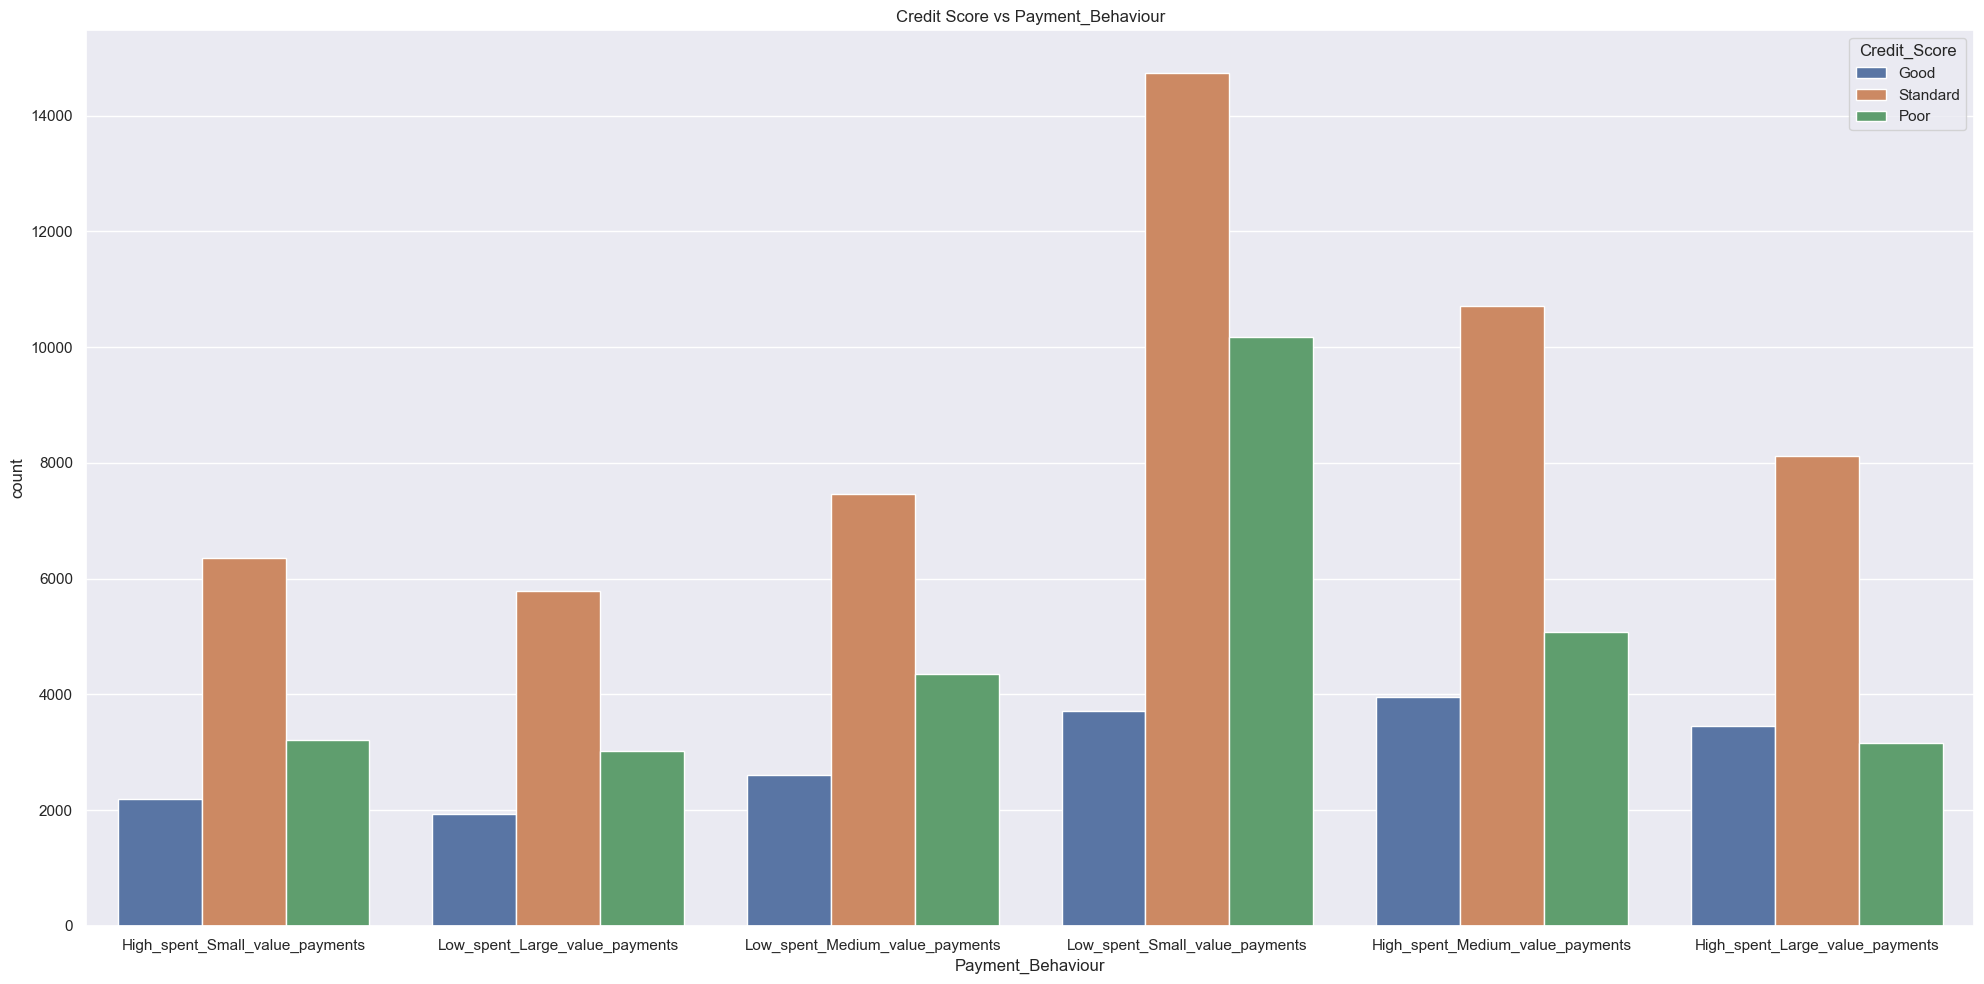

In [77]:
#Plot Credit score vs Payment_Behaviour
plt.figure(figsize=(20, 10))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=data)
plt.title('Credit Score vs Payment_Behaviour')
plt.tight_layout()
plt.show()

Plot correlation map


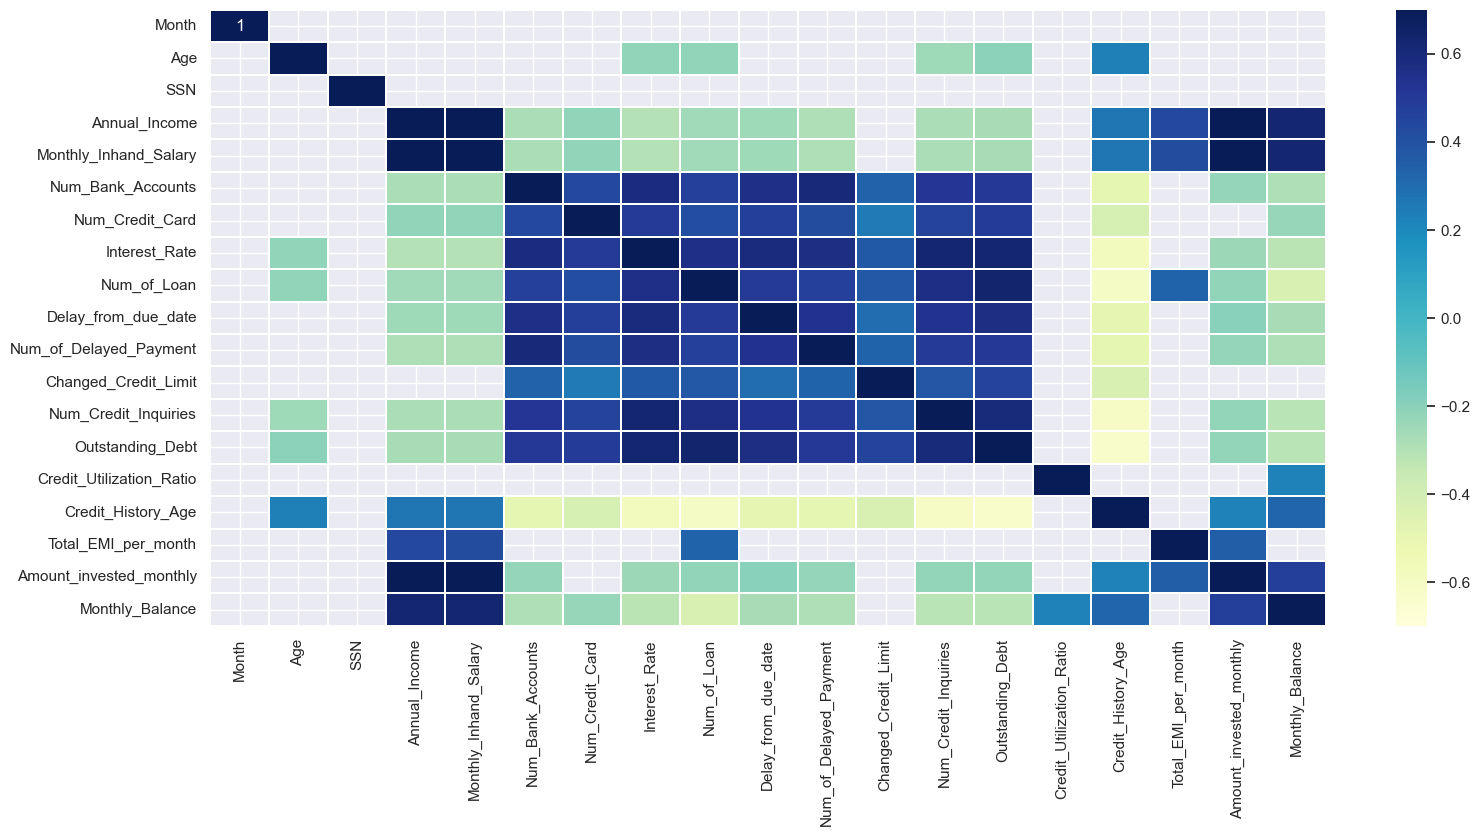

In [78]:
corr = data.select_dtypes(include = ['float64','int64']).corr()
mask = (corr <= 0.2) & (corr >= -0.2)
plt.subplots(figsize = (18,8))
sns.heatmap(corr.mask(mask),vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')
plt.show()

Annual income ,amount invested monthly and monthly inhand salary are highly correlated.

# Data Preprocessing

In [79]:
#Checking missing values
data.isna().sum()

Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

No Null Values to handle

Outlier handling

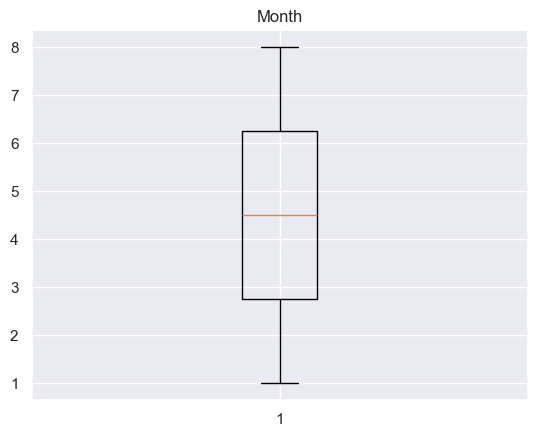

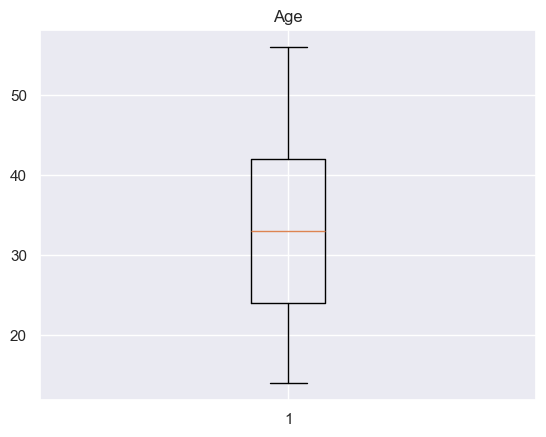

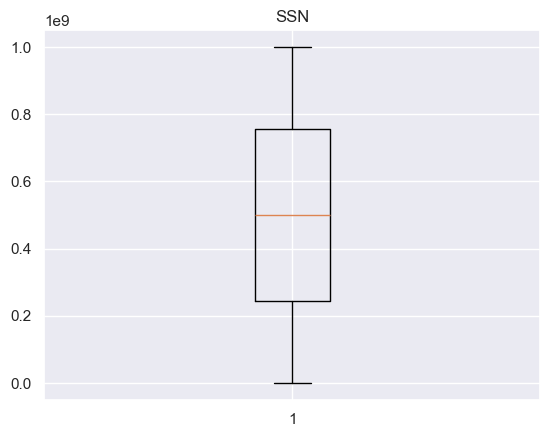

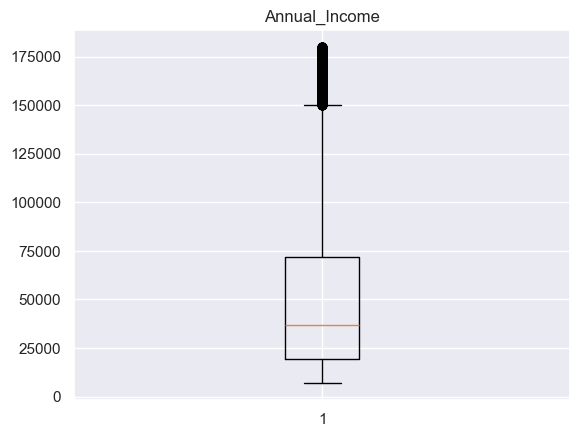

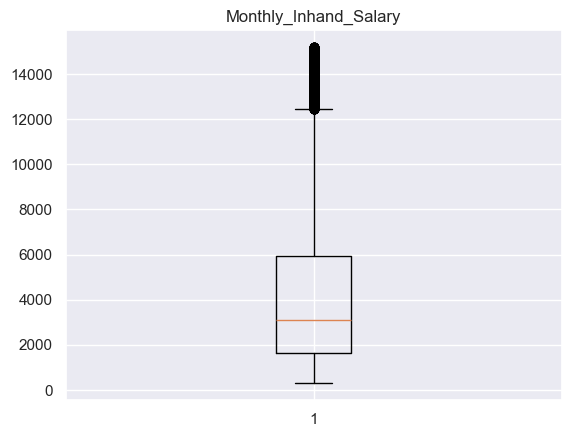

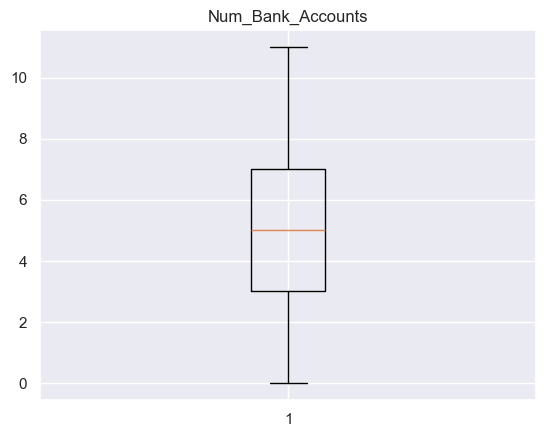

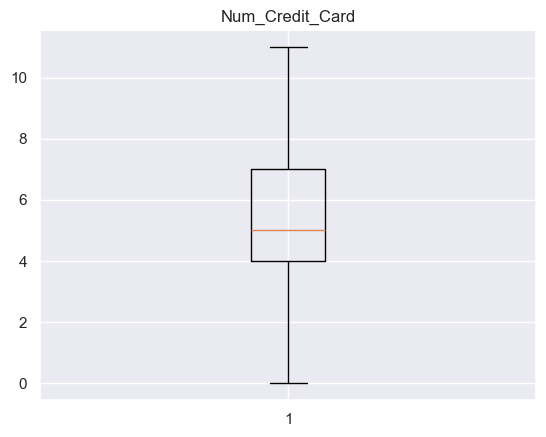

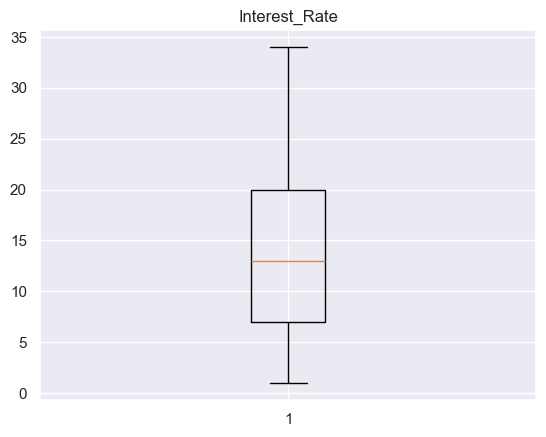

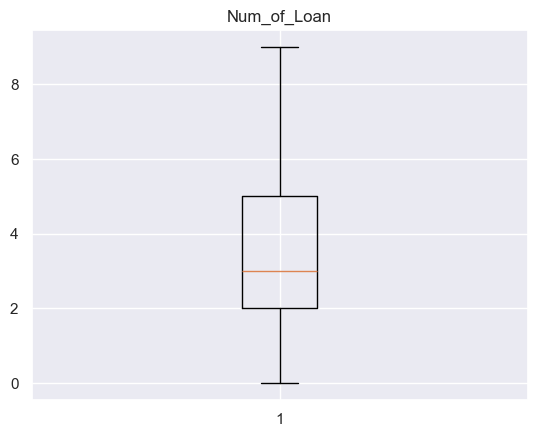

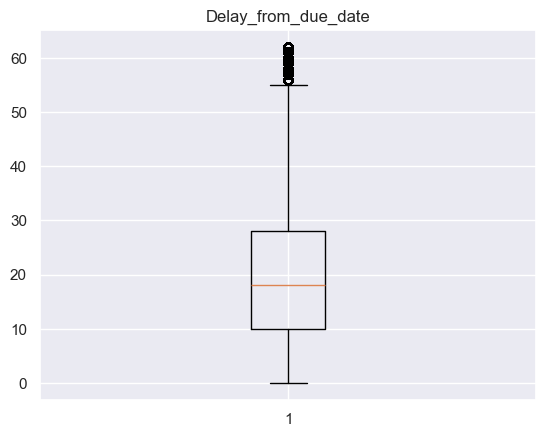

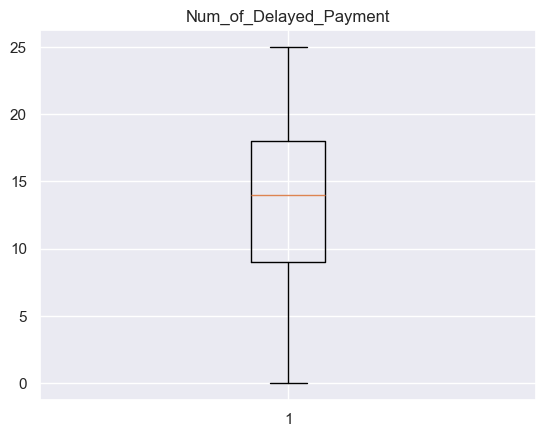

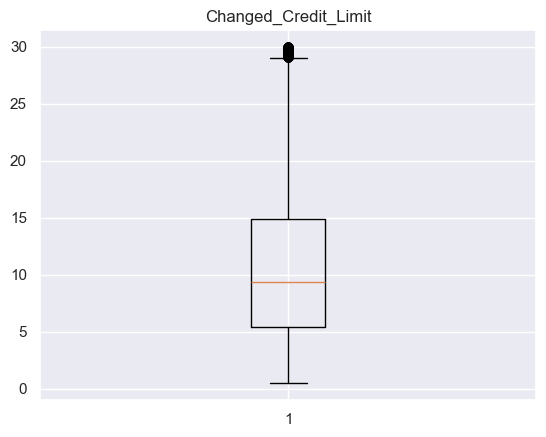

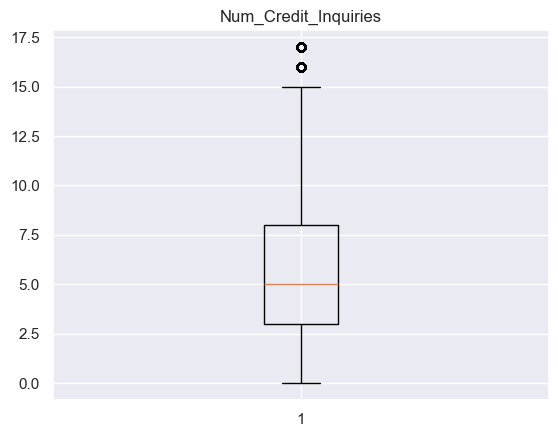

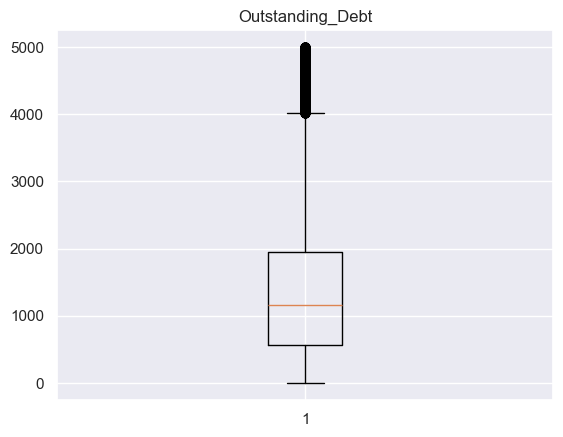

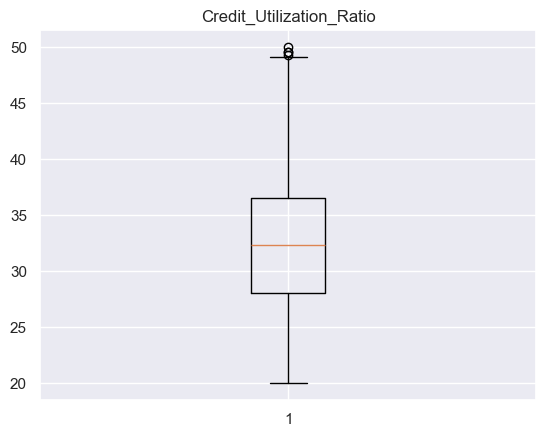

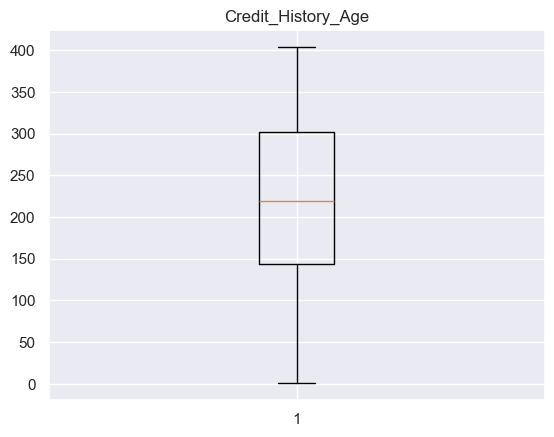

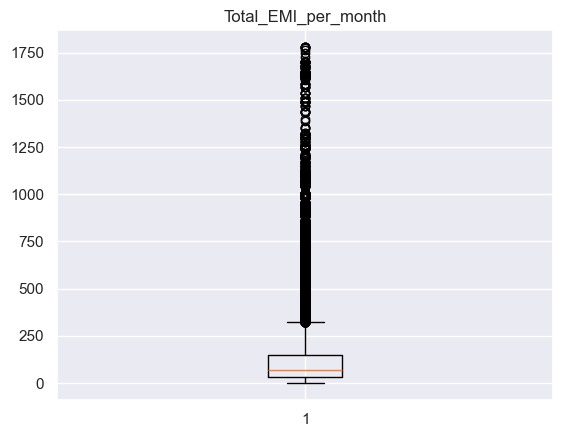

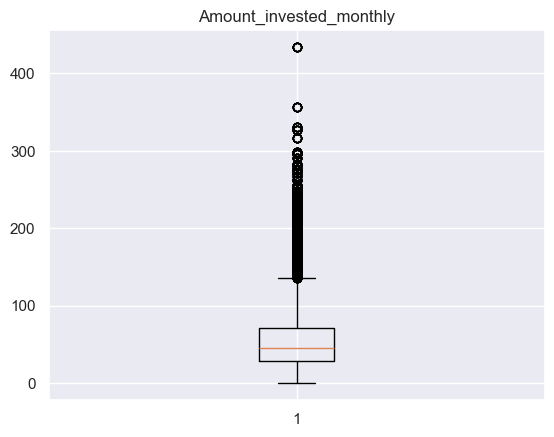

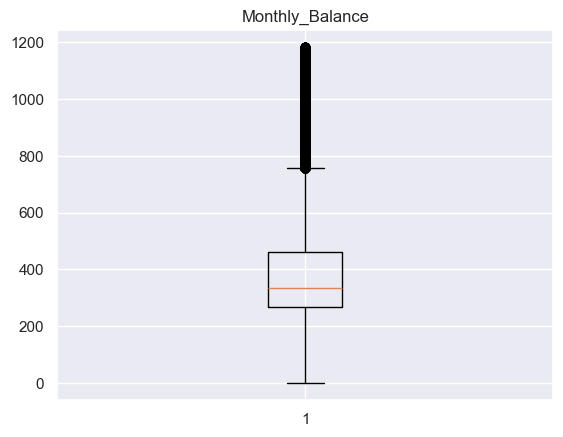

In [80]:
num_columns=data.select_dtypes(include=['float64','int64'])
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


We decided to keep outliers. So we are using models that can handle outlier.

In [81]:
#The Credit_Mix column is valuable for determining credit scores.It is categorical, let's convert into numerical by assigning values 0,1,2 
# Before transformation
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [82]:
data_copy=data.copy()


In [83]:
#Transforming the column in 0, 1, or 2.
data['Credit_Mix'] = data['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [84]:
# After transformation
data['Credit_Mix'].unique()

array([2, 1, 0], dtype=int64)

# Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
data['Credit_Score'] = le.fit_transform(data['Credit_Score'])
data['Type_of_Loan'] = le.fit_transform(data['Type_of_Loan'])
data['Occupation'] = le.fit_transform(data['Occupation'])

Occupation has 15 values and Type_of_Loan has 16 uniqu

In [86]:
obj_columns = data.select_dtypes(include=['object']).columns
print(obj_columns)
exclude_columns = ['Credit_Score', 'Type_of_Loan', 'Occupation']
categorical_columns = [col for col in obj_columns if col not in exclude_columns]

encoder ={}
for col in categorical_columns:
    oe = OneHotEncoder(drop='first', sparse_output=False)
    transformed_data = oe.fit_transform(data[[col]])
    transformed_df = pd.DataFrame(transformed_data, columns=oe.get_feature_names_out([col]))
    
    # Drop the original column and concatenate the new one-hot encoded columns
    data = data.drop(col, axis=1).join(transformed_df)
    encoder[col] = oe


Index(['Payment_of_Min_Amount', 'Payment_Behaviour'], dtype='object')


In [87]:
data.head(15)

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,2,809.98,26.822620,265.0,49.574949,21.465380,312.494089,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,4.0,11.27,4.0,2,809.98,31.944960,266.0,49.574949,21.465380,284.629162,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,2,809.98,28.609352,267.0,49.574949,21.465380,331.209863,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,4.0,6.27,4.0,2,809.98,31.377862,268.0,49.574949,21.465380,223.451310,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,4.0,11.27,4.0,2,809.98,24.797347,269.0,49.574949,21.465380,341.489231,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,6,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,8.0,4.0,9.27,4.0,2,809.98,27.262259,270.0,49.574949,21.465380,340.479212,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,7,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,8.0,11.27,4.0,2,809.98,22.537593,271.0,49.574949,21.465380,244.565317,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,6.0,11.27,4.0,2,809.98,23.933795,272.0,49.574949,21.465380,358.124168,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1,28.0,4075839.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,684,3.0,4.0,5.42,2.0,2,605.03,24.464031,319.0,18.816215,39.684018,470.690627,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2,28.0,4075839.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,684,7.0,1.0,7.42,2.0,2,605.03,38.550848,320.0,18.816215,39.684018,484.591214,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
data.shape

(100000, 30)

Let’s split the data into the target and feature variables.


In [93]:
data.columns


Index(['Month', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object')

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int64  
 1   Age                                                 100000 non-null  float64
 2   SSN                                                 100000 non-null  float64
 3   Occupation                                          100000 non-null  int32  
 4   Annual_Income                                       100000 non-null  float64
 5   Monthly_Inhand_Salary                               100000 non-null  float64
 6   Num_Bank_Accounts                                   100000 non-null  float64
 7   Num_Credit_Card                                     100000 non-null  float64
 8   Interest_Rate                                       100000 non-nu

In [90]:
x = data.drop(columns = ['Credit_Score'],axis=1)
y = data['Credit_Score']


 # Divide the data into training, validation, and testing sets

In [91]:
from sklearn.model_selection import train_test_split
x_train_val,x_test,y_train_val,y_test= train_test_split(x,y,random_state=42,test_size=.2)
x_train,x_val,y_train,y_val= train_test_split(x_train_val,y_train_val,random_state=42,test_size=.25)

In [92]:
print(f'Train set size: {len(x_train)}')
print(f'Validation set size: {len(x_val)}')
print(f'Test set size: {len(x_test)}')

Train set size: 60000
Validation set size: 20000
Test set size: 20000
